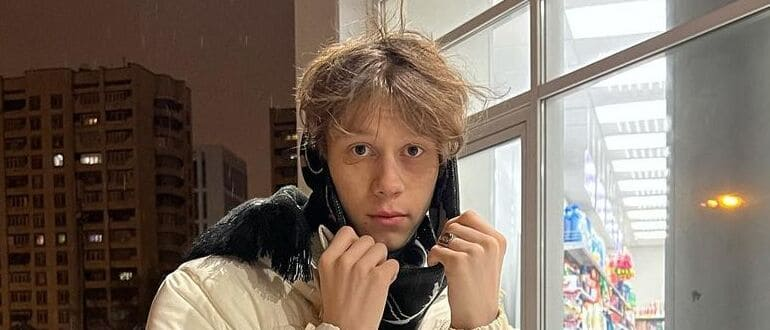!</center>



In [10]:
# https://www.youtube.com/@dilbliin

# Установка библиотек

In [13]:
# pip install youtube_transcript_api
# pip install nltk
# pip install matplotlib
# pip install art
# pip install google-api-python-client
# pip install pandas

# import nltk
# nltk.download('punkt')

# Содержание 
- Анализ контента.
- Просмотр последних 10 видео.
- Анализ лайков/просмотров.
- Анализ субтитров.


# Импорт библиотек

In [1]:
# Импорт библиотеки для получения транскрипции видео с YouTube
from youtube_transcript_api import YouTubeTranscriptApi 
# Импорт библиотеки для подсчета элементов в коллекции
from collections import Counter
# Импорт библиотеки для работы с регулярными выражениями
import re
# Импорт модуля для стемминга слов с использованием алгоритма Porter
from nltk.stem import PorterStemmer
# Импорт библиотеки для визуализации данных
import matplotlib.pyplot as plt
# Импорт функции для отображения текста в стиле ASCII-арт
from art import tprint
# Импорт библиотеки для взаимодействия с YouTube API
from googleapiclient.discovery import build
# Импорт модуля для работы со временем
import time
# Импорт библиотеки для визуализации данных
import matplotlib.pyplot as plt
# Импорт библиотеки для работы с табличными данными
import pandas as pd

# ID

In [53]:
# UCcQZMSBg_nbOdWbQak11uqw - ID Канала
# https://www.youtube.com/watch?v=      279Y-ZtZfq0
# https://www.youtube.com/watch?v=      0vgnaXn0zAI

# API

In [2]:
api_key = 'Tvoy Api'

# Код

In [18]:
# Функция для получения информации о канале с использованием YouTube API
def get_channel_info(youtube, channel_id_input):
    """
    Получает информацию о канале с использованием YouTube API.

    Параметры:
    - youtube (obj): Объект YouTube API с настройками.
    - channel_id_input (str): Айди канала.

    Возвращает:
    - list: Список словарей с информацией о видео.
    """
    # Запрос информации о канале по его айди
    channels_response = youtube.channels().list(
        id=channel_id_input,
        part='contentDetails'
    ).execute()

    channels = channels_response.get('items', [])  # Извлечение списка каналов из ответа
    data = []  # Инициализация списка для хранения информации о видео

    if channels:
        # Получение ID плейлиста с загруженными видео
        uploads_playlist_id = channels[0]['contentDetails']['relatedPlaylists']['uploads']

        # Запрос списка видео в указанном плейлисте
        playlist_items_response = youtube.playlistItems().list(
            playlistId=uploads_playlist_id,
            part='contentDetails',
            maxResults=10  # Вы можете изменить количество результатов по вашему желанию
        ).execute()

        # Извлечение информации о видео и его статистике
        for item in playlist_items_response['items']:
            video_id = item['contentDetails']['videoId']

            video_response = youtube.videos().list(
                id=video_id,
                part='snippet,statistics'
            ).execute()

            video_title = video_response['items'][0]['snippet']['title']
            view_count = int(video_response['items'][0]['statistics']['viewCount'])
            like_count = int(video_response['items'][0]['statistics'].get('likeCount', 0))
            dislike_count = int(video_response['items'][0]['statistics'].get('dislikeCount', 0))

            # Добавление данных о видео в список
            data.append({
                "Video Title": video_title,
                "Video ID": video_id,
                "Views": view_count,
                "Likes": like_count,
                "Dislikes": dislike_count
            })

    return data


# Основная функция для выполнения запроса и отображения информации о видео в DataFrame
def main():
    """
    Основная функция для выполнения запроса и отображения информации о видео в DataFrame.
    """
    # Получите айди канала от пользователя
    channel_id_input = input("Введите айди канала: ")
    youtube = build('youtube', 'v3', developerKey=api_key)  # Создание объекта YouTube API с настройками

    # Получите информацию о канале
    data = get_channel_info(youtube, channel_id_input)

    if data:
        # Создайте DataFrame
        df = pd.DataFrame(data)

        # Отобразите DataFrame
        print(df)

        # Сохраните DataFrame в CSV файл
        df.to_csv('channel_info.csv', index=False)
        print("DataFrame сохранен в файл 'channel_info.csv'.")
    else:
        print("Канал не найден.")


# Выполнение основной функции при запуске скрипта
if __name__ == "__main__":
    main()


Введите айди канала:  UCcQZMSBg_nbOdWbQak11uqw


                                         Video Title     Video ID    Views  \
0  СВИДАНИЕ ВСЛЕПУЮ с МИКРО-НАУШНИКОМ (ft.Пикап-Т...  Hlv2EIh_juk   741217   
1  УГАДАЙ ПАРНЯ СРЕДИ ДЕВУШЕК (ft.Янчик, Данон, С...  ez-Y-i6gl7A  1999661   
2  БЛОГЕРЫ VS СТУДЕНТЫ / Битва Умов ( Горилла, Ст...  -yuw7-fS94M   769963   
3  МОЙ ПЕРВЫЙ РАЗ ЗА ГРАНИЦЕЙ.. ( Парадевич, Гори...  brfUolHlVdw   933351   
4              Прожарка БУСТЕРА, ГОРИЛЫ И ЯНЧИКА *2*  9opBdlAOVVk  1019131   
5  ПРЕСС-КОНФЕРЕНЦИЯ: Каверзные Вопросы (ft.Кореш...  X00-AUn0kF0  1329886   
6  МЕНЯ ПРОЖАРИВАЮТ КОМИКИ (ft.Бустер, Горила, Ян...  mNJFJPttJyw  1462971   
7  Блогеры Отвечают на Жесткие Вопросы ! Главный ...  279Y-ZtZfq0  2040196   
8  СТРАННЫЕ ПРОБЫ С МИКРО-НАУШНИКОМ (ft.Бустер, К...  BPNA8gzDQas  1529690   
9  АКТЕРСКИЕ ПРОБЫ С МИКРО-НАУШНИКОМ ( ft. Кореш,...  pa9R-LqpIWU  1849096   

    Likes  Dislikes  
0   45912         0  
1  116297         0  
2   43127         0  
3   49340         0  
4   67862         0  
5   80297

In [19]:
# Укажите путь к вашему файлу CSV
file_path = r'D:/DataScience/YouTube Projects/channel_info.csv'

# Прочитайте CSV файл в DataFrame
df = pd.read_csv(file_path)

# Теперь df содержит данные из файла CSV
print(df)

                                         Video Title     Video ID    Views  \
0  СВИДАНИЕ ВСЛЕПУЮ с МИКРО-НАУШНИКОМ (ft.Пикап-Т...  Hlv2EIh_juk   741217   
1  УГАДАЙ ПАРНЯ СРЕДИ ДЕВУШЕК (ft.Янчик, Данон, С...  ez-Y-i6gl7A  1999661   
2  БЛОГЕРЫ VS СТУДЕНТЫ / Битва Умов ( Горилла, Ст...  -yuw7-fS94M   769963   
3  МОЙ ПЕРВЫЙ РАЗ ЗА ГРАНИЦЕЙ.. ( Парадевич, Гори...  brfUolHlVdw   933351   
4              Прожарка БУСТЕРА, ГОРИЛЫ И ЯНЧИКА *2*  9opBdlAOVVk  1019131   
5  ПРЕСС-КОНФЕРЕНЦИЯ: Каверзные Вопросы (ft.Кореш...  X00-AUn0kF0  1329886   
6  МЕНЯ ПРОЖАРИВАЮТ КОМИКИ (ft.Бустер, Горила, Ян...  mNJFJPttJyw  1462971   
7  Блогеры Отвечают на Жесткие Вопросы ! Главный ...  279Y-ZtZfq0  2040196   
8  СТРАННЫЕ ПРОБЫ С МИКРО-НАУШНИКОМ (ft.Бустер, К...  BPNA8gzDQas  1529690   
9  АКТЕРСКИЕ ПРОБЫ С МИКРО-НАУШНИКОМ ( ft. Кореш,...  pa9R-LqpIWU  1849096   

    Likes  Dislikes  
0   45912         0  
1  116297         0  
2   43127         0  
3   49340         0  
4   67862         0  
5   80297

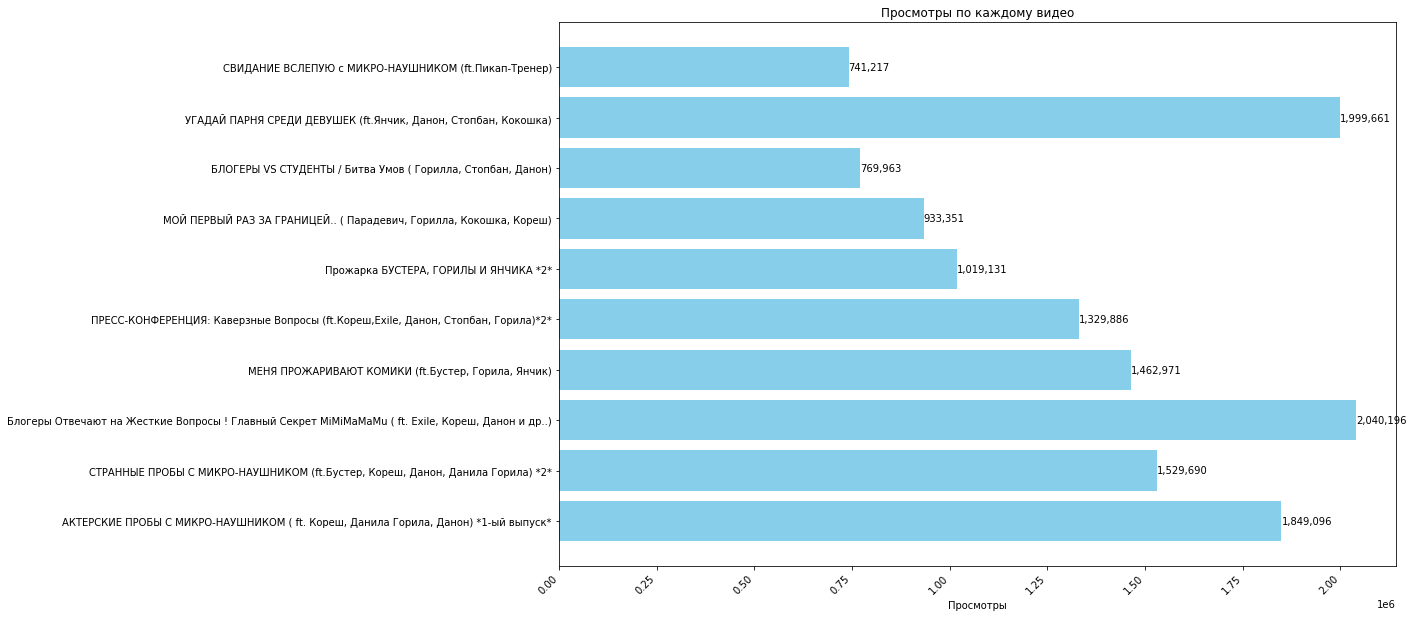

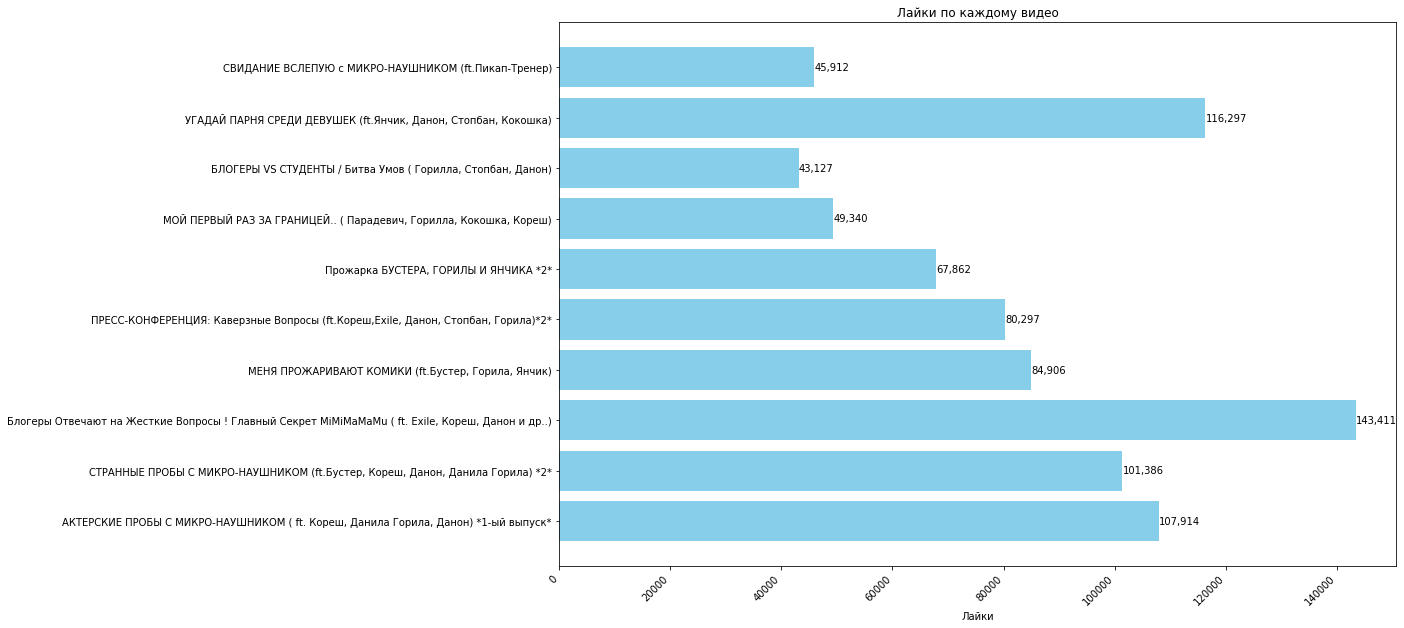

In [20]:
# Предполагается, что у вас есть DataFrame df с предоставленными данными таблицы
# Извлечение данных из DataFrame

video_titles = df['Video Title']  # Извлечение заголовков видео
video_views = df['Views']  # Извлечение количества просмотров

# Создание горизонтальной столбчатой диаграммы с повернутыми заголовками
plt.figure(figsize=(15, 10))
bars = plt.barh(video_titles, video_views, color='skyblue')  # Создание столбцов с цветом небесно-голубого
plt.xlabel('Просмотры')  # Задание подписи оси X
plt.title('Просмотры по каждому видео')  # Задание заголовка графика

# Поворот заголовков видео на 45 градусов
plt.xticks(rotation=45, ha='right')

# Инверсия оси Y для размещения видео с наибольшим количеством просмотров вверху
plt.gca().invert_yaxis()

# Добавление меток данных на столбцах
for bar, view in zip(bars, video_views):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{view:,}', va='center')

plt.show()

# Предполагается, что у вас есть DataFrame df с предоставленными данными таблицы
# Извлечение данных из DataFrame

video_titles = df['Video Title']  # Извлечение заголовков видео
video_views = df['Likes']  # Извлечение количества лайков

# Создание горизонтальной столбчатой диаграммы с повернутыми заголовками
plt.figure(figsize=(15, 10))
bars = plt.barh(video_titles, video_views, color='skyblue')  # Создание столбцов с цветом небесно-голубого
plt.xlabel('Лайки')  # Задание подписи оси X
plt.title('Лайки по каждому видео')  # Задание заголовка графика

# Поворот заголовков видео на 45 градусов
plt.xticks(rotation=45, ha='right')

# Инверсия оси Y для размещения видео с наибольшим количеством лайков вверху
plt.gca().invert_yaxis()

# Добавление меток данных на столбцах
for bar, view in zip(bars, video_views):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{view:,}', va='center')

plt.show()


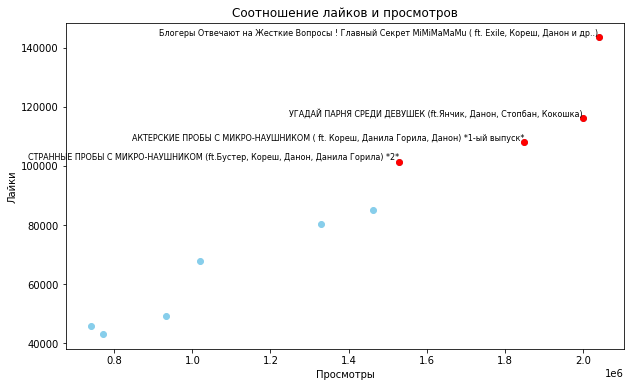

In [21]:
# Предполагается, что у вас есть DataFrame df с предоставленными данными таблицы
# Извлечение данных из DataFrame
video_titles = df['Video Title']  # Получение столбца 'Video Title' (названия видео)
video_views = df['Views']  # Получение столбца 'Views' (количество просмотров видео)
video_likes = df['Likes']  # Получение столбца 'Likes' (количество лайков видео)

# Задайте критерии для приемлемого количества лайков и просмотров
acceptable_likes = 100000  # Можете изменить это значение в зависимости от ваших предпочтений
acceptable_views = 1000000  # Можете изменить это значение в зависимости от ваших предпочтений

# Создание точечной диаграммы
plt.figure(figsize=(10, 6))
plt.scatter(video_views, video_likes, color='skyblue')  # Размещение точек на диаграмме

# Выделение видео, соответствующего вашим критериям
for title, views, likes in zip(video_titles, video_views, video_likes):
    if likes >= acceptable_likes and views >= acceptable_views:
        plt.scatter(views, likes, color='red')  # Выделение точки красным цветом
        plt.text(views, likes, title, fontsize=8, ha='right', va='bottom')  # Добавление текста (названия видео) к точке

plt.xlabel('Просмотры')  # Подпись оси X
plt.ylabel('Лайки')  # Подпись оси Y
plt.title('Соотношение лайков и просмотров')  # Заголовок диаграммы

plt.show()  # Отображение диаграммы


# Работа с субтитрами

In [22]:
# Вызов метода get_transcript с указанием YouTube-идентификатора видео ("9opBdlAOVVk&t=2s") и языка ("ru")
# для получения транскрипции видео на русском языке
srt = YouTubeTranscriptApi.get_transcript("9opBdlAOVVk&t=3s", languages=['ru'])

In [23]:
# Получение списка транскрипций (субтитров) для конкретного видео по его ID и времени начала
transcript_list = YouTubeTranscriptApi.list_transcripts("9opBdlAOVVk&t=3s")

# Итерация по списку транскрипций для каждого фрагмента субтитров
for transcript in transcript_list:
    # Вывод информации о видео: ID, язык и код языка
    print("", 
        "ID Видео:", transcript.video_id, "\n",
        "Язык Видео:", transcript.language, "\n",
        "Код языка: ", transcript.language_code)

 ID Видео: 9opBdlAOVVk&t=3s 
 Язык Видео: Russian (auto-generated) 
 Код языка:  ru


## Запись в txt

In [24]:
# Открываем файл "subtitles_дилблин.txt" в режиме записи ("w")
with open("subtitles_дилблин.txt", "w") as f:
    # Итерируем по элементам списка или другой итерируемой коллекции 'srt'
    for i in srt:
        # Записываем каждый элемент 'i' в файл 'f' с добавлением символа новой строки "\n"
        f.write("{}\n".format(i))

## Анализ слов из видео

In [27]:
# Открываем файл с субтитрами для чтения
with open('subtitles_дилблин.txt', 'r', errors='ignore') as file:
    # Считываем все строки из файла
    lines = file.readlines()

# Извлекаем текст из каждой строки и объединяем в одну строку
text = ' '.join([eval(line)['text'] for line in lines])

# Приводим все слова к нижнему регистру
text_lower = text.lower()

# Используем регулярное выражение для извлечения слов
words = re.findall(r'\b\w+\b', text_lower)

# Фильтруем слова, содержащие корень "мам"
words_with_mam_root = [word for word in words if 'мам' in word]

# Считаем частоту встречаемости слов
word_counter = Counter(words_with_mam_root)

# Выводим суммарную частоту слов с корнем "мам"
print(f"Суммарная частота слов с корнем: {sum(word_counter.values())} раз")

Суммарная частота слов с корнем: 14 раз


In [35]:
# Создаем экземпляр стеммера Портера
stemmer = PorterStemmer()

# Открываем файл с субтитрами для чтения
with open('subtitles_дилблин.txt', 'r', errors='ignore') as file:
    # Считываем все строки из файла
    lines = file.readlines()

# Извлекаем текст из каждой строки и объединяем в одну строку
text = ' '.join([eval(line)['text'] for line in lines])

# Приводим все слова к нижнему регистру
text_lower = text.lower()

# Используем регулярное выражение для извлечения слов
words = re.findall(r'\b\w+\b', text_lower)

# Исключаем слова с четырьмя буквами
filtered_words = [word for word in words if len(word) > 4]

# Применяем стемминг к каждому слову
stemmed_words = [stemmer.stem(word) for word in filtered_words]

# Считаем частоту встречаемости слов
word_counter = Counter(stemmed_words)

# Выводим самые часто встречающиеся слова
print("Самые часто встречающиеся слова:")
for word, count in word_counter.most_common(10):
    print(f"{word}: {count} раз")

Самые часто встречающиеся слова:
очень: 23 раз
просто: 23 раз
янчик: 21 раз
вообще: 18 раз
спасибо: 18 раз
сейчас: 15 раз
поэтому: 13 раз
давай: 13 раз
шутки: 12 раз
только: 11 раз


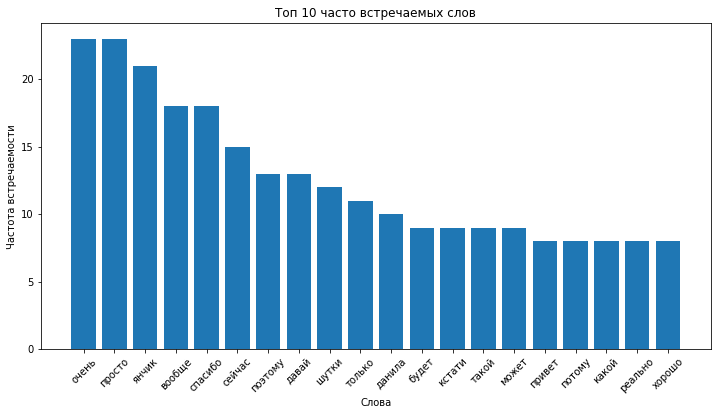

In [39]:
# Находим 40 наиболее часто встречающихся слов с их частотами
top_words = word_counter.most_common(20)

# Создаем новый график размером 12x6 дюймов
plt.figure(figsize=(12, 6))
# Строим столбчатую диаграмму для топ 10 слов
plt.bar([word[0] for word in top_words], [count[1] for count in top_words])
# Задаем подпись оси x как 'Слова'
plt.xlabel('Слова')
# Задаем подпись оси y как 'Частота встречаемости'
plt.ylabel('Частота встречаемости')
# Устанавливаем заголовок графика
plt.title('Топ 10 часто встречаемых слов')
# Поворачиваем подписи оси x на 45 градусов для лучшей читаемости
plt.xticks(rotation=45)
# Отображаем график
plt.show()